## Which version of the website should you use?

The team of early-stage startup in Germany has been working on a redesign of the landing page. They believe a new design will increase the number of people who click through and join the site. 

They have been testing the changes for a few weeks and now they want to measure the impact of the change and need to determine if the increase can be due to random chance or if it is statistically significant.

## 💾 The data
The team assembled the following file:

#### Redesign test data
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

In [2]:
import pandas as pd
df = pd.read_csv('./data/redesign.csv')
df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


First let's check the number of test for each group of page design.

In [3]:
df.groupby(['treatment', 'new_images'])['converted'].count()

treatment  new_images
no         no            10121
           yes           10121
yes        no            10121
           yes           10121
Name: converted, dtype: int64

It looks good. For each group we have the same number of tests measured and number of over 10 000 for each should be enough to say that scores are practically significant.

### Conversion rate.
Now I can calculate the conversion rate for each group. 

In [4]:
cr = df.groupby(['treatment', 'new_images'])['converted'].value_counts(normalize=True).sort_values().head(4).to_frame()
cr = round(cr*100, 2)
cr.columns=['conversion rate [%]']
cr

conversion rate [%]
treatment new_images converted                     
no        no         1                        10.71
          yes        1                        11.25
yes       yes        1                        11.37
          no         1                        12.00

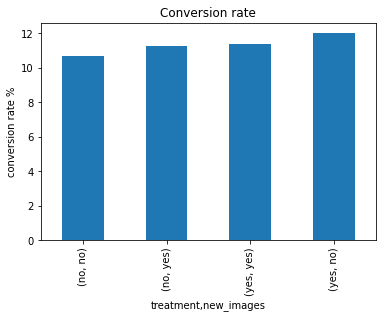

In [5]:
cr = cr.reset_index(level=2, drop=True)
cr.plot(kind='bar', legend=False, title='Conversion rate').set(ylabel='conversion rate %');

<b> Conversion rate increase.</b><br>
According to data from tests we can see that each change on the page leads to higher conversion rate. The best score is for new treatment with old images.

<b> T-test</b><br>
Now I can check if those results are statistically significant.<br>
For that I will run t-test for each group with changes to website against control group. 

The t test tells you how significant the differences between groups are (it lets you know if those differences (measured in means) could have happened by chance).<br> 
Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values less than 5% (0.05) indicate that the data did not occur by chance.

In [13]:
from scipy.stats import ttest_ind
control = df[(df['treatment']=='no') & (df['new_images']=='no')]['converted']
no_yes = df[(df['treatment']=='no') & (df['new_images']=='yes')]['converted']
yes_yes = df[(df['treatment']=='yes') & (df['new_images']=='yes')]['converted']
yes_no = df[(df['treatment']=='yes') & (df['new_images']=='no')]['converted']
print('P-value for OLD treatment; NEW images: {}'.format(ttest_ind(control, no_yes)[1]))

P-value for OLD treatment; NEW images: 0.21633455200827426


In [11]:
print('P-value for NEW treatment; NEW images: {}'.format(ttest_ind(control, yes_yes)[1]))

P-value for NEW treatment; NEW images: 0.1329565317146


In [12]:
print('P-value for NEW treatment; OLD images: {}'.format(ttest_ind(control, yes_no)[1]))

P-value for NEW treatment; OLD images: 0.0037077320206196714


We can see  that only for redesign with <b>new treatment</b> of page and <b>old images</b>, p-value is smaller than 0.05, which indicates this is <b>statistically significant</b>.<br>
